# Dataset Description

You are provided hourly rental data spanning two years. For this competition, the training set is comprised of the first 19 days of each month, while the test set is the 20th to the end of the month. You must predict the total count of bikes rented during each hour covered by the test set, using only information available prior to the rental period.

#### Data Fields
- **datetime** - hourly date + timestamp  
- **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
- **holiday** - whether the day is considered a holiday
- **workingday** - whether the day is neither a weekend nor holiday
- **weather:**
            1: Clear, Few clouds, Partly cloudy, Partly cloudy
            2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
            3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
            4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
- **temp** - temperature in Celsius
- **atemp** - "feels like" temperature in Celsius
- **humidity** - relative humidity
- **windspeed** - wind speed
- **casual** - number of non-registered user rentals initiated
- **registered** - number of registered user rentals initiated
- **count** - number of total rentals

In [1]:
# Import libraries necessary for this project
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read the data
df = pd.read_csv('train.csv') 
df_test = pd.read_csv('test.csv') 

In [3]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [4]:
# Data shape
print(df.shape)
print(df_test.shape)

(10886, 12)
(6493, 9)


##### Observation: there is 2 missing columns 

In [5]:
# Data columns comparison 
print(df.columns)
print(df_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'casual', 'registered', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [6]:
# Drop 2 missing columns
df = df.drop(['casual','registered'], axis=1)

In [7]:
# Data columns
print(df.columns)
print(df_test.columns)

Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed', 'count'],
      dtype='object')
Index(['datetime', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'atemp', 'humidity', 'windspeed'],
      dtype='object')


In [8]:
# statistical summary 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
datetime,10886,10886,2011-01-01 00:00:00,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,10886.0,NaN,NaN,NaN,2.506614,1.116174,1.0,2.0,3.0,4.0,4.0
holiday,10886.0,NaN,NaN,NaN,0.028569,0.166599,0.0,0.0,0.0,0.0,1.0
workingday,10886.0,NaN,NaN,NaN,0.680875,0.466159,0.0,0.0,1.0,1.0,1.0
weather,10886.0,NaN,NaN,NaN,1.418427,0.633839,1.0,1.0,1.0,2.0,4.0
temp,10886.0,NaN,NaN,NaN,20.23086,7.79159,0.82,13.94,20.5,26.24,41.0
atemp,10886.0,NaN,NaN,NaN,23.655084,8.474601,0.76,16.665,24.24,31.06,45.455
humidity,10886.0,NaN,NaN,NaN,61.88646,19.245033,0.0,47.0,62.0,77.0,100.0
windspeed,10886.0,NaN,NaN,NaN,12.799395,8.164537,0.0,7.0015,12.998,16.9979,56.9969
count,10886.0,NaN,NaN,NaN,191.574132,181.144454,1.0,42.0,145.0,284.0,977.0


In [9]:
# Data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    10886 non-null  object 
 1   season      10886 non-null  int64  
 2   holiday     10886 non-null  int64  
 3   workingday  10886 non-null  int64  
 4   weather     10886 non-null  int64  
 5   temp        10886 non-null  float64
 6   atemp       10886 non-null  float64
 7   humidity    10886 non-null  int64  
 8   windspeed   10886 non-null  float64
 9   count       10886 non-null  int64  
dtypes: float64(3), int64(6), object(1)
memory usage: 850.6+ KB


##### Observation: datetime format needs to be changed 

In [10]:
# missing values 
df.isna().sum()

datetime      0
season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
dtype: int64

##### Observation: No missing values 

## Create baseline model

In [11]:
# remove unwanted columns 
X = df.drop(['datetime', 'count'], axis=1)
y = df['count']

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# RandomForestRegressor model 
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

# Model Score 
from sklearn.metrics import mean_squared_log_error
y_pred = model.predict(X_train)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_train, y_pred))


y_pred = model.predict(X_test)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_test, y_pred))

0.7021820973548966
1.5457958039717128


<AxesSubplot:>

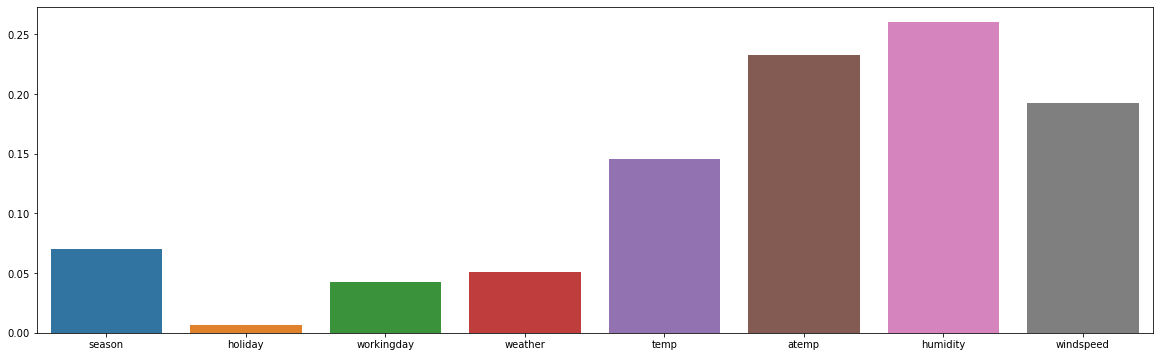

In [12]:
# feature importances
importance = model.feature_importances_
plt.figure(figsize=(20,6))

sns.barplot(x=X.columns, y=importance)

<AxesSubplot:>

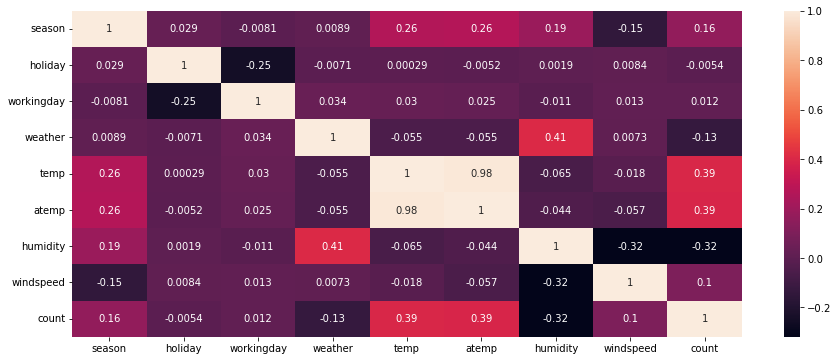

In [13]:
plt.figure(figsize=(15,6))
sns.heatmap(df.corr(), annot=True)

##### Observation: 
- temp and atemp has same information 
- workingday, holiday has same information
- 'season', 'weather', 'temp', 'humidity', 'windspeed' are the most correlated features 

In [14]:
# drop temp, holiday column
df = df.drop(['temp', 'holiday'], axis=1)
df_test = df_test.drop(['temp', 'holiday'], axis=1)

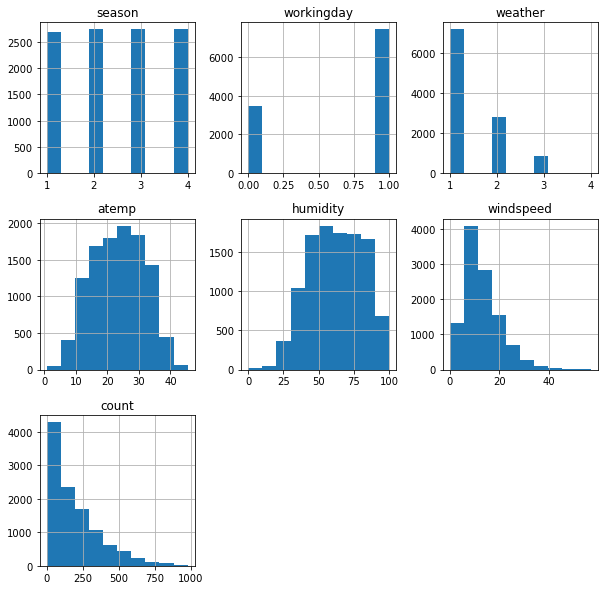

In [15]:
# Histogram 
df.hist(figsize=(10,10));

<AxesSubplot:xlabel='count'>

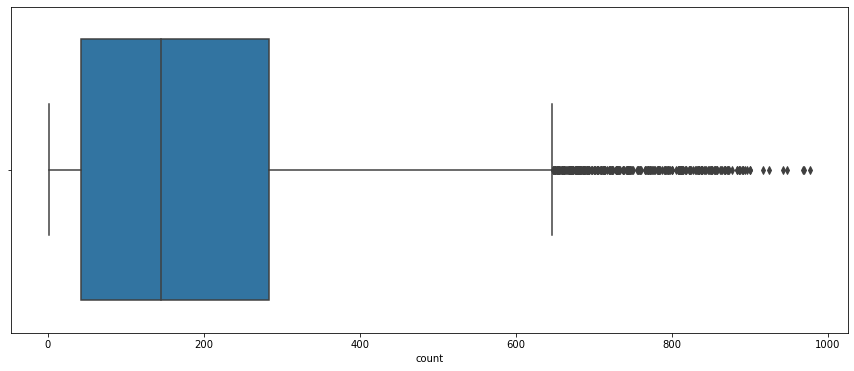

In [16]:
# Boxplot 
plt.figure(figsize=(15,6))

sns.boxplot(data=df, x='count')

### Observations:
- **season** ,  **weather** need one hot encoding
- we need hour From **datetime** coulmn

## Data engineering:


In [17]:
# split datetime column
import calendar
from datetime import datetime  as dtt

df["date"] = df.datetime.apply(lambda x : x.split()[0])
df["hour"] = df.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
df["year"] = df.date.apply(lambda x : x.split("-")[0]).astype("int")
df["month"] = df["date"].str[-5:-3].astype("int")

df_test["date"] = df_test.datetime.apply(lambda x : x.split()[0])
df_test["hour"] = df_test.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
df_test["year"] = df_test.date.apply(lambda x : x.split("-")[0]).astype("int")
df_test["month"] = df_test["date"].str[-5:-3].astype("int")

df = df.drop(['date'], axis=1)
df_test = df_test.drop(['date'], axis=1)
df_test.tail()

,datetime,season,workingday,weather,atemp,humidity,windspeed,hour,year,month
6488,2012-12-31 19:00:00,1,1,2,12.880,60,11.0014,19,2012,12
6489,2012-12-31 20:00:00,1,1,2,12.880,60,11.0014,20,2012,12
6490,2012-12-31 21:00:00,1,1,1,12.880,60,11.0014,21,2012,12
6491,2012-12-31 22:00:00,1,1,1,13.635,56,8.9981,22,2012,12
6492,2012-12-31 23:00:00,1,1,1,13.635,65,8.9981,23,2012,12


In [18]:
# OneHotEncoding

print('Before:')
print(df.shape)
print(df_test.shape)

cols = ['season', 'weather']

df[cols] = df[cols].astype(object)
df_test[cols] = df_test[cols].astype(object)

train = pd.get_dummies(df[cols])  
test = pd.get_dummies(df_test[cols])    
OH_cols_train, OH_cols_test = train.align(test, join='inner', axis=1)  # inner join


# Add one-hot encoded columns to numerical features
df = pd.concat([df, OH_cols_train], axis=1)
df_test = pd.concat([df_test, OH_cols_test], axis=1)

print('After:')
print(df.shape)
print(df_test.shape)

Before:
(10886, 11)
(6493, 10)
After:
(10886, 19)
(6493, 18)


In [19]:
df_test= df_test.set_index('datetime')
df= df.set_index('datetime')

## Split Data:
(Before removing the outliers)

In [20]:
# Remove rows with missing target, separate target from predictors
df.dropna(axis=0, subset=['count'], inplace=True)
y = df['count']
x = df.drop(['count'], axis=1)

In [21]:
# train test split
from sklearn.model_selection import train_test_split
X_t, X_v, y_t, y_v = train_test_split(x, y, test_size=0.3, random_state=0)

In [22]:
df_train = pd.concat([X_t, y_t], axis=1)
df_val = pd.concat([X_v, y_v], axis=1)

print(df.shape)
print(df_train.shape)
print(df_val.shape)
print(df_test.shape)

(10886, 18)
(7620, 18)
(3266, 18)
(6493, 17)


## Numerical data:



<AxesSubplot:xlabel='atemp', ylabel='count'>

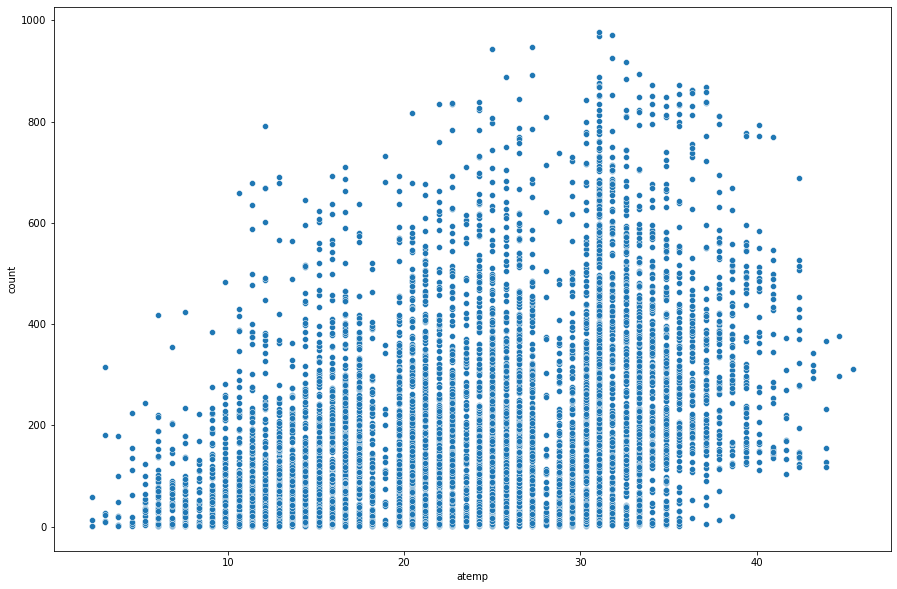

In [23]:
# See if there outliers 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train, x='atemp',y='count')

#### Observation: No outliers 

<AxesSubplot:xlabel='humidity', ylabel='count'>

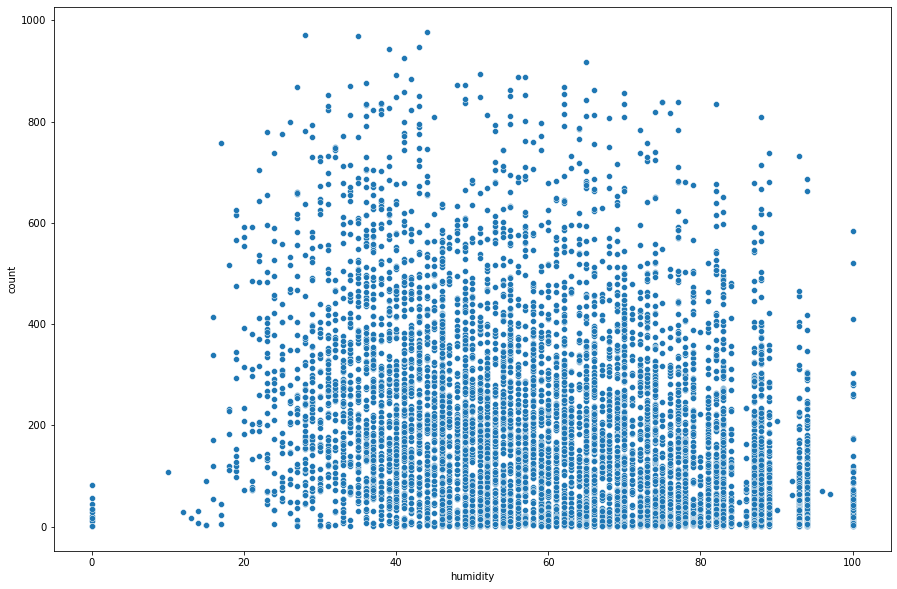

In [24]:
# See if there outliers 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train, x='humidity',y='count')

#### Observation: There are many outliers less than 20

In [25]:
# replace outliers with (20)

df_train['humidity'] = np.where(df_train.humidity < 20, 20, df_train.humidity)
df_val['humidity'] = np.where(df_val.humidity < 20, 20, df_val.humidity)
df_test['humidity'] = np.where(df_test.humidity < 20, 20, df_test.humidity)


<AxesSubplot:xlabel='humidity', ylabel='count'>

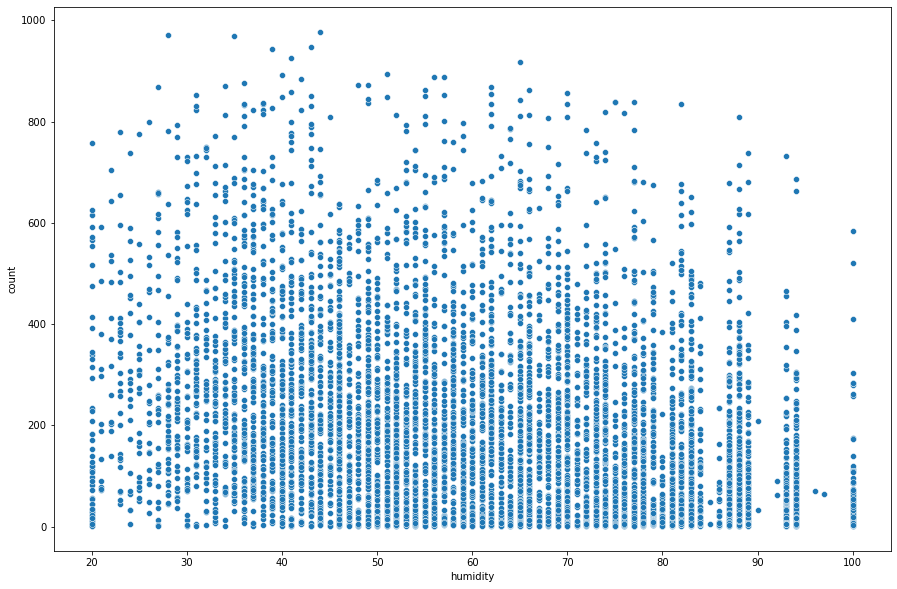

In [26]:
# See if there outliers 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train, x='humidity',y='count')

#### Observation: Outliers has been removed 

<AxesSubplot:xlabel='windspeed', ylabel='count'>

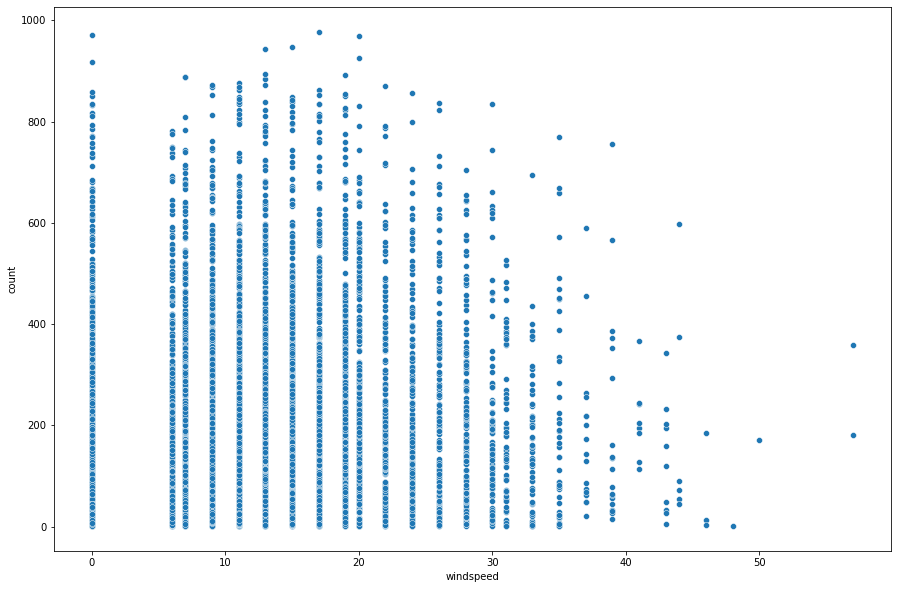

In [27]:
# See if there outliers 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train, x='windspeed',y='count')

#### Observation: There are many outliers in windspeed

In [28]:
# replace outliers with (40)

df_train['windspeed'] = np.where(df_train.windspeed > 40, 40, df_train.humidity)
df_val['windspeed'] = np.where(df_val.windspeed > 40, 40, df_val.humidity)
df_test['windspeed'] = np.where(df_test.windspeed > 40, 40, df_test.humidity)


<AxesSubplot:xlabel='windspeed', ylabel='count'>

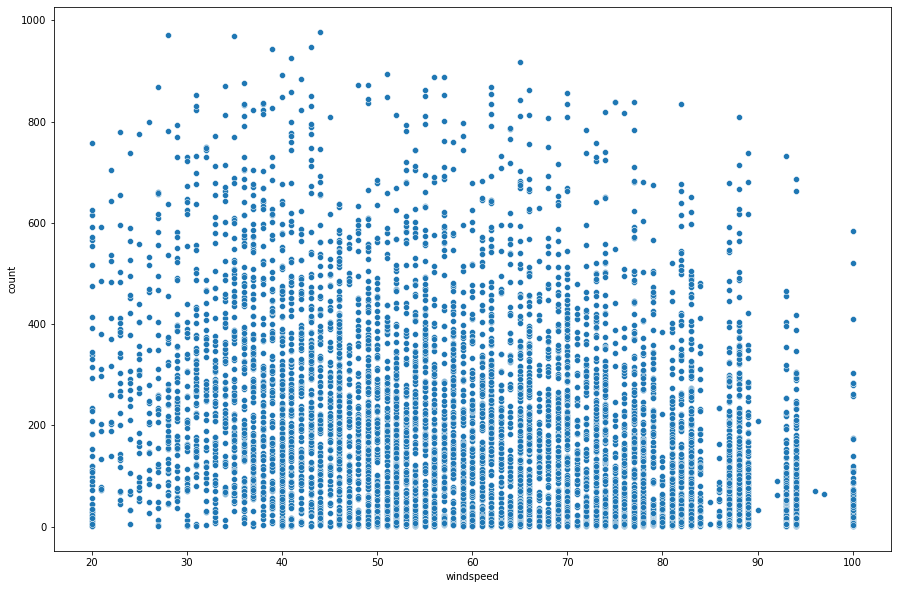

In [29]:
# See if there outliers 
plt.figure(figsize=(15,10))
sns.scatterplot(data=df_train, x='windspeed',y='count')

#### Observation: Outliers has been removed 

## Categorical data:



<AxesSubplot:xlabel='season', ylabel='count'>

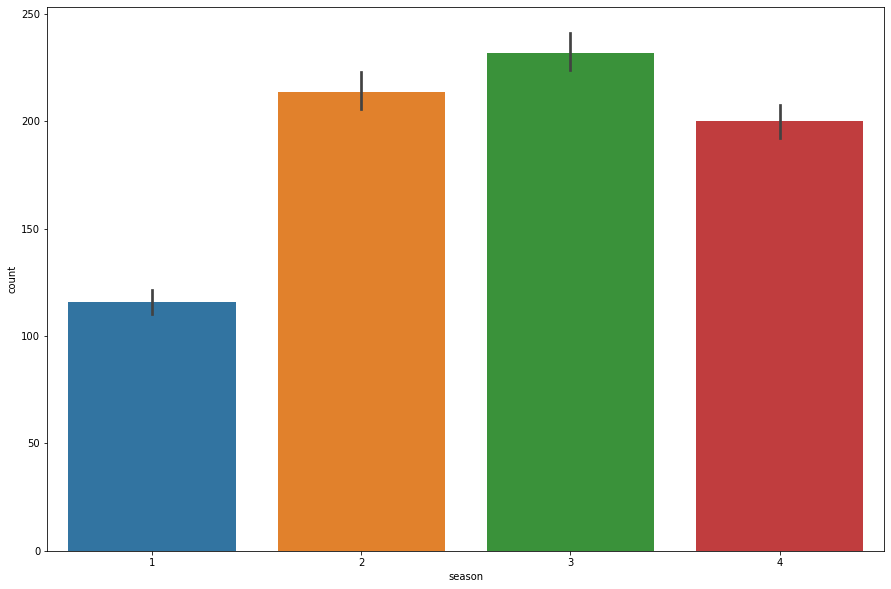

In [30]:
# Barplot
plt.figure(figsize=(15,10))
sns.barplot(data=df_train, x='season',y='count')

In [31]:
df_train.groupby('season')['count'].agg([len,min,max])

,len,min,max
season,,,
1,1902,1,801
2,1908,1,868
3,1912,1,977
4,1898,1,948


<AxesSubplot:xlabel='workingday', ylabel='count'>

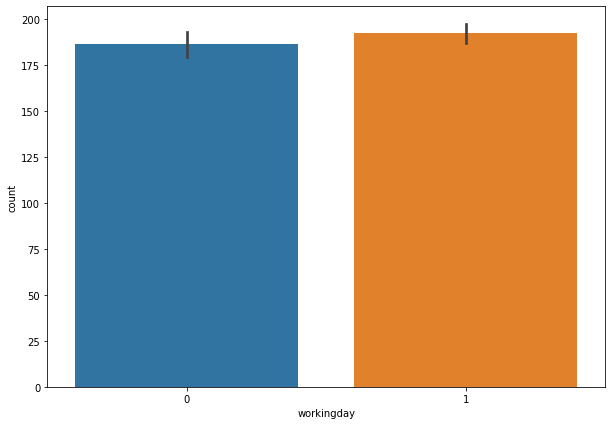

In [32]:
# Barplot
plt.figure(figsize=(10,7))
sns.barplot(data=df_train, x='workingday',y='count')

In [33]:
df_train.groupby('workingday')['count'].agg([len,min,max])

,len,min,max
workingday,,,
0,2426,1,743
1,5194,1,977


<AxesSubplot:xlabel='weather', ylabel='count'>

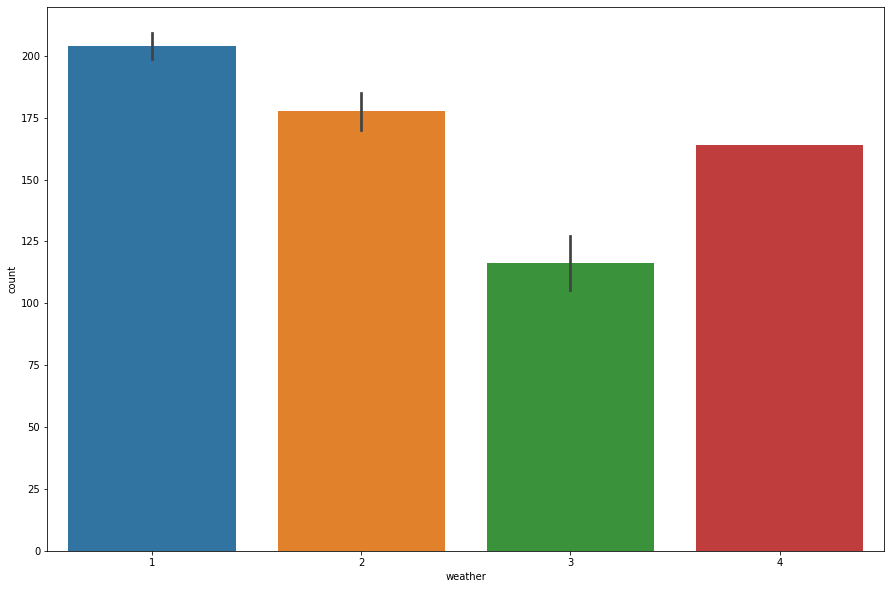

In [34]:
# Barplot
plt.figure(figsize=(15,10))
sns.barplot(data=df_train, x='weather',y='count')

In [35]:
df_train.groupby('weather')['count'].agg([len,min,max])

,len,min,max
weather,,,
1,5061,1,977
2,1967,1,868
3,591,1,819
4,1,164,164


<AxesSubplot:xlabel='hour', ylabel='count'>

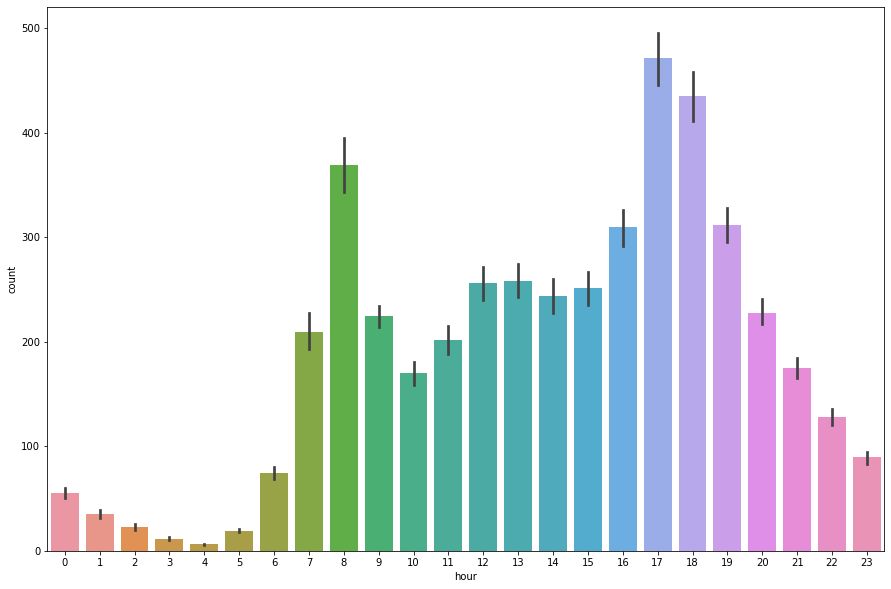

In [36]:
# Barplot
plt.figure(figsize=(15,10))
sns.barplot(data=df_train, x='hour',y='count')

In [37]:
df_train.groupby('hour')['count'].agg([len,min,max])

,len,min,max
hour,,,
0,324,3,283
1,323,1,168
2,317,1,119
3,303,1,66
4,308,1,26
5,315,1,57
6,327,1,213
7,312,1,596
8,303,8,839


<AxesSubplot:xlabel='month', ylabel='count'>

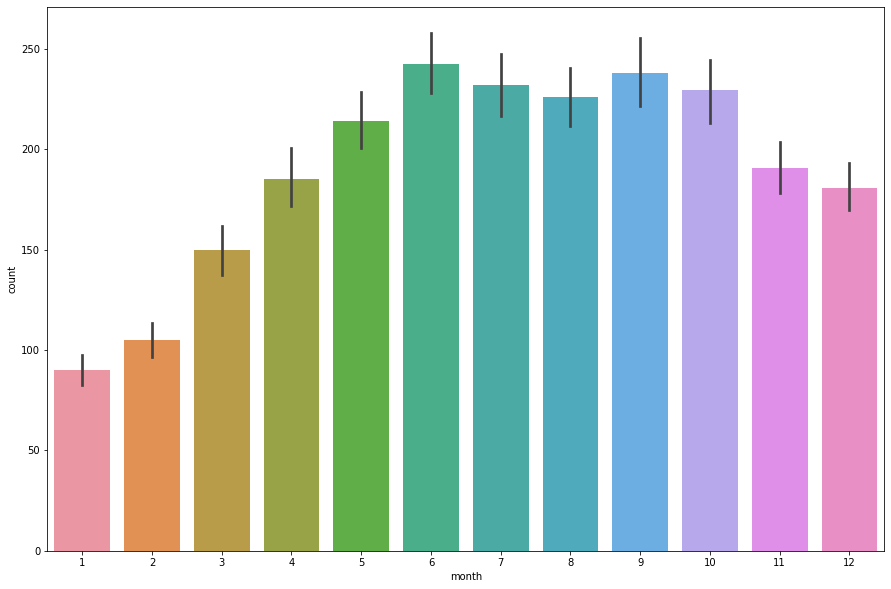

In [38]:
# Barplot
plt.figure(figsize=(15,10))
sns.barplot(data=df_train, x='month',y='count')

In [39]:
df_train.groupby('month')['count'].agg([len,min,max])

,len,min,max
month,,,
1,617,1,499
2,634,1,539
3,651,1,801
4,640,1,822
5,647,1,868
6,621,2,850
7,635,1,872
8,645,1,868
9,632,1,977


<AxesSubplot:xlabel='year', ylabel='count'>

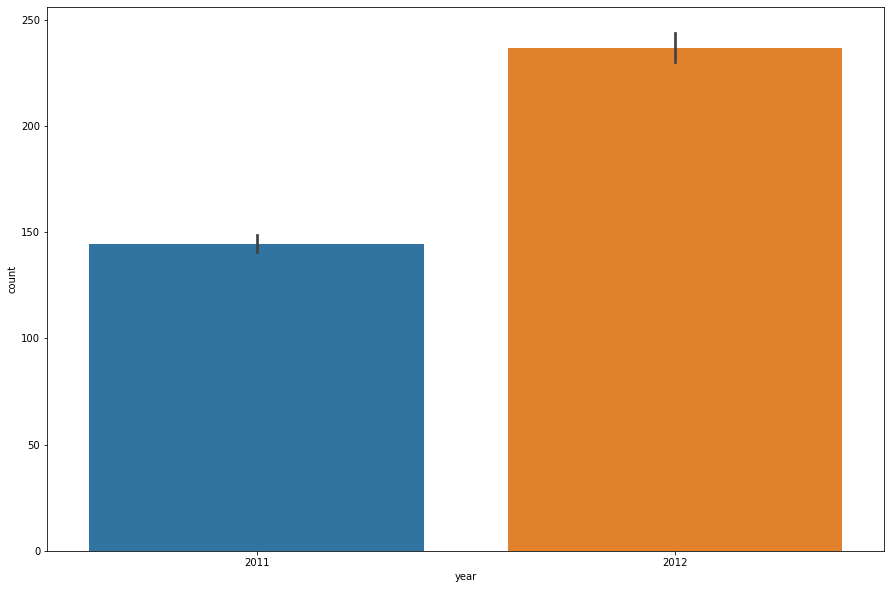

In [40]:
# Barplot
plt.figure(figsize=(15,10))
sns.barplot(data=df_train, x='year',y='count')

In [41]:
df_train.groupby('year')['count'].agg([len,min,max])

,len,min,max
year,,,
2011,3823,1,638
2012,3797,1,977


### Observations:
- **workingday** has the smallest effect on **count**


In [42]:
# drop OneHotEncoding columns
df_train.drop(cols, axis=1, inplace=True)
df_val.drop(cols, axis=1, inplace=True)
df_test.drop(cols, axis=1, inplace=True)
x.drop(cols, axis=1, inplace=True)

df_train.head()

,workingday,atemp,humidity,windspeed,hour,year,month,season_1,season_2,season_3,season_4,weather_1,weather_2,weather_3,weather_4,count
datetime,,,,,,,,,,,,,,,,
2012-08-01 13:00:00,1,37.120,52,52,13,2012,8,0,0,1,0,1,0,0,0,280
2012-08-16 18:00:00,1,35.605,36,36,18,2012,8,0,0,1,0,1,0,0,0,832
2012-02-13 09:00:00,1,6.820,50,50,9,2012,2,1,0,0,0,1,0,0,0,205
2012-03-06 23:00:00,1,13.635,61,61,23,2012,3,1,0,0,0,1,0,0,0,54
2012-12-19 15:00:00,1,21.210,50,50,15,2012,12,0,0,0,1,1,0,0,0,237


In [43]:
# x,y split

X_train = df_train.drop(['count'], axis=1)
y_train = df_train['count'] 
X_val = df_val.drop(['count'], axis=1)
y_val = df_val['count']

## Models:

In [44]:
# Model function 
from sklearn.linear_model import (
    LinearRegression,
    TheilSenRegressor,
    RANSACRegressor,
    HuberRegressor
)

def train(model):
    model.fit(X_train, y_train)

    # Model Score 
    y_pred = model.predict(X_train)
    y_pred = np.where(y_pred < 0, 0, y_pred)
    print("Train MSLE:")
    print(mean_squared_log_error(y_train, y_pred))


    y_pred = model.predict(X_val)
    y_pred = np.where(y_pred < 0, 0, y_pred)
    print("Test MSLE:")
    print(mean_squared_log_error(y_val, y_pred))
    

In [45]:
# Model mean squared log error
train(LinearRegression())

Train MSLE:
1.6950427736985407
Test MSLE:
1.6379110558694914


In [46]:
# Model mean squared log error
train(TheilSenRegressor())

Train MSLE:
6.15364058000955
Test MSLE:
6.16859277832718


In [47]:
# Model mean squared log error
train(RANSACRegressor())

Train MSLE:
1.6580588470189073
Test MSLE:
1.534088135802884


In [48]:
# Model mean squared log error
train(HuberRegressor())

Train MSLE:
1.5083307073162737
Test MSLE:
1.5314168082880393


D:\anaconda3\lib\site-packages\sklearn\linear_model\_huber.py:296: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [49]:
# Model mean squared log error
train(RandomForestRegressor())

Train MSLE:
0.02630660936130187
Test MSLE:
0.12735207553845027


#### RandomForest has the best MSLE (0.19)

# Function to select best parameters for a machine learning model

In [50]:
# Score function 
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

def get_score(n_estimators):
    
    my_pipeline = Pipeline(steps=[
    ('preprocessor', SimpleImputer()),
    ('model', RandomForestRegressor(n_estimators=n_estimators, random_state=0))
    ])
    
    # Multiply by -1 since sklearn calculates *negative* MAE
    scores = -1 * cross_val_score(my_pipeline, X_train, y_train,
                                  cv=3,
                                  scoring='neg_mean_absolute_error')

    print("Average MAE score:", scores.mean())
    return scores.mean()

In [51]:
# Test different parameter values
results = {}
for i in range(8):
    results[(i+1)*50] =get_score((i+1)*50)

Average MAE score: 29.500810929883766
Average MAE score: 29.331257819335082
Average MAE score: 29.236591200058324
Average MAE score: 29.194777148168985
Average MAE score: 29.201120665750114
Average MAE score: 29.19493279867795
Average MAE score: 29.20150777923593
Average MAE score: 29.228812590874057


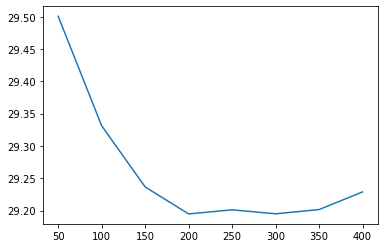

In [52]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(list(results.keys()), list(results.values()))
plt.show()

In [53]:
# New RandomForest model 
RF = RandomForestRegressor(n_estimators= 200,random_state=0)
RF.fit(X_train, y_train)

# Model Score 
from sklearn.metrics import mean_squared_log_error
y_pred = RF.predict(X_train)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_train, y_pred))


y_pred = RF.predict(X_val)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_val, y_pred))

0.026134997711692327
0.12710823802527182


# Generate a submission


In [54]:
# Apply the model to all the data we have before submition
X_all = pd.concat([X_train,X_val])
y_all =  pd.concat([y_train,y_val])

# RandomForest model 
RF.fit(X_all, y_all)

# Model Score 
from sklearn.metrics import mean_squared_log_error
y_pred = RF.predict(X_train)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_train, y_pred))


y_pred = RF.predict(X_val)
y_pred = np.where(y_pred < 0, 0, y_pred)
print(mean_squared_log_error(y_val, y_pred))

0.025011513048085254
0.025225828495619957


In [55]:
# fill test null values
df_test=df_test.fillna(method ='ffill')

test_preds = RF.predict(df_test)
test= df_test.reset_index()

# Run the code to save predictions in the format used for competition scoring
output = pd.DataFrame({'datetime': test.datetime,
                       'count': test_preds})
output.to_csv('submission.csv', index=False)


<AxesSubplot:>

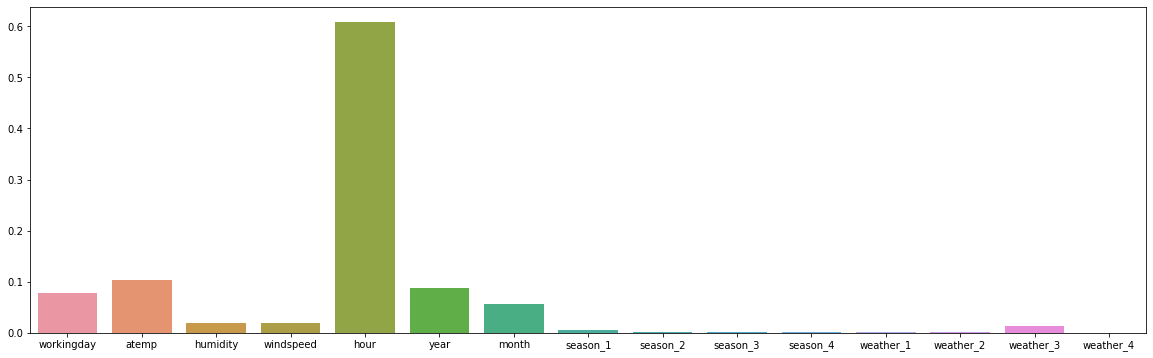

In [56]:
# feature importances
importance = RF.feature_importances_
plt.figure(figsize=(20,6))

sns.barplot(x=X_all.columns, y=importance)

### kaggle Score: 0.48273
(best score on kaggle was **0.33756**)